In [60]:
#import required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Decision tree classifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics # scikit-learn metrics module for computing accuracy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # Ignore warning messages

In [34]:
wine_df_columns=['class','Alcohol','Malicacid','Ash','Alcalinity_of_ash','Magnesium','Total_phenols','Flavanoids','Nonflavanoid_phenols','Proanthocyanins','Color_intensity','Hue','0D280_0D315_of_diluted_wines','Proline']

In [35]:
#loading dataset
wine_df = pd.read_csv('https://raw.githubusercontent.com/NishaniKasineshan/Exploratory-Data-Analysis-on-winequality-dataset/main/wine.data',sep=',',names=wine_df_columns)
wine_df.head() # Preview the dataset

,class,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [36]:
wine_df.shape # Number of instances and variables

(178, 14)

In [37]:
wine_df.columns

Index(['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')

In [38]:
#dataset summary
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malicacid                     178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  0D280_0D315_of_diluted_wines  178 non-null    float64
 13  Proli

In [39]:
#exploring target variable
wine_df['class'].value_counts()

2    71
1    59
3    48
Name: class, dtype: int64

In [40]:
#check for missing values in variables
wine_df.isnull().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

feature scaling is not required for decision tree classifier

In [72]:
#define feature vector and target variable
X = wine_df.drop(['class'], axis=1) # Drop the target variable
y = wine_df['class']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

((133, 13), (45, 13))

In [74]:
#building decision tree classifier with gini index criterion
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)#create decision tree classifier object
clf_gini.fit(X_train,y_train)#train the classifier

DecisionTreeClassifier(max_depth=4, random_state=0)

In [78]:
y_pred=clf_gini.predict(X_test)

In [79]:
#evaluating the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


<Axes: >

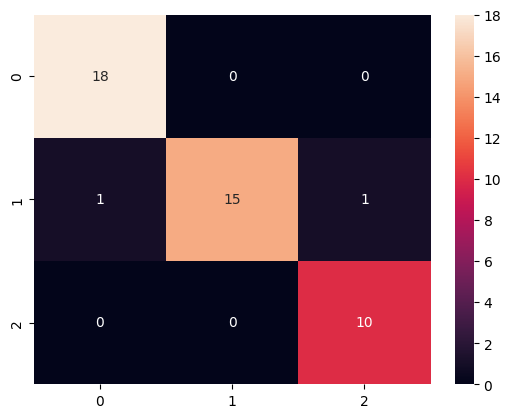

In [80]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True)

In [81]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



In [48]:
#building decision tree classifier with entropy criterion
clf_entropy=DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)#create decision tree classifier object
clf_entropy.fit(X_train,y_train)#train the classifier

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [49]:
y_pred=clf_gini.predict(X_test)

In [50]:
#evaluating the model
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9555555555555556


<Axes: >

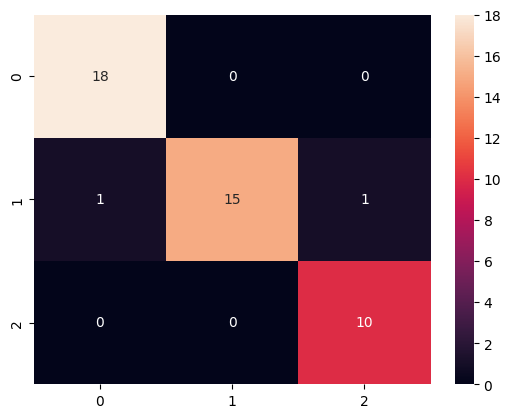

In [51]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat,annot=True)

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.95      1.00      0.97        18
           2       1.00      0.88      0.94        17
           3       0.91      1.00      0.95        10

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.95        45



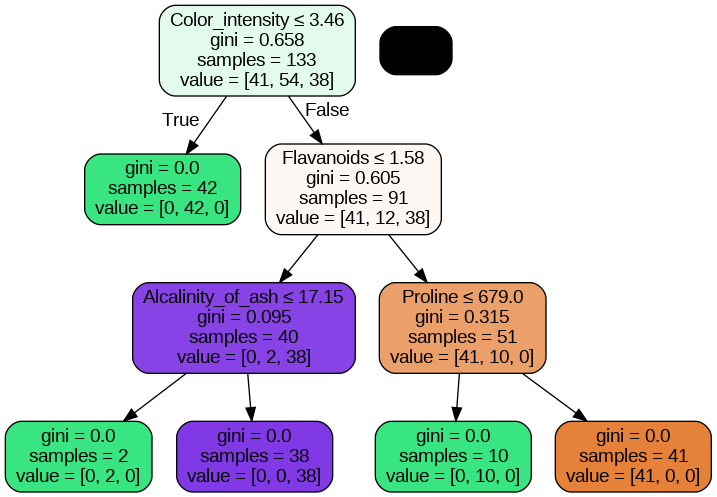

In [54]:
#visualizing decision trees
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_gini,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wini-gini.png')
Image(graph.create_png())


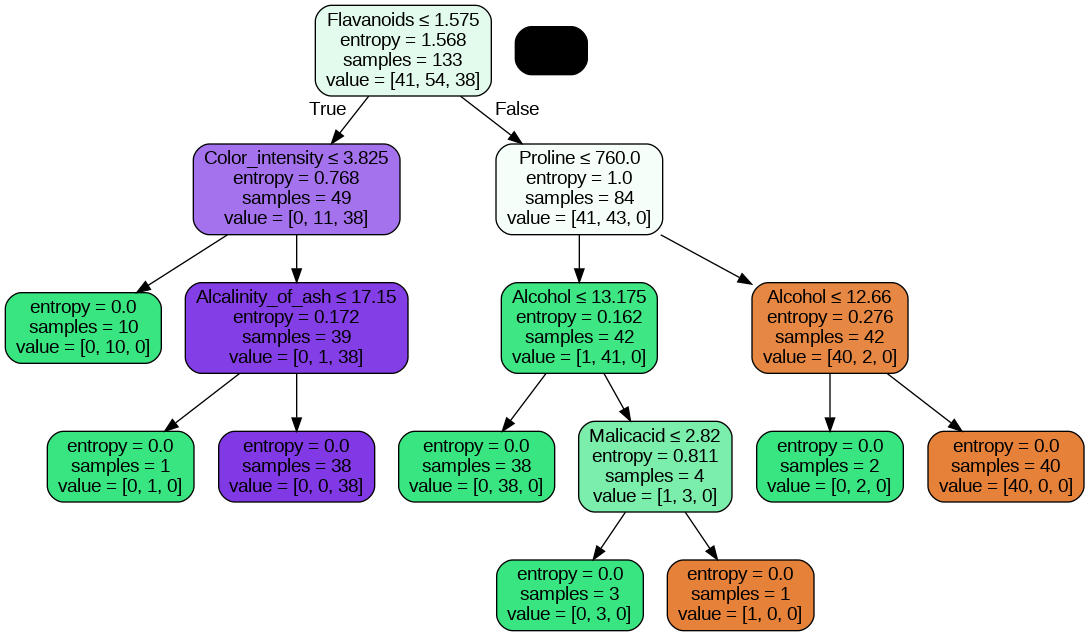

In [56]:
#visualizing decision trees
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(clf_entropy,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine-entropy.png')
Image(graph.create_png())



---



Test for missing values: Introduce some missing values in dataset

In [58]:
missing_wine_df=wine_df

In [59]:
#freq distributions of values in variables
for col in missing_wine_df.columns:
  print(missing_wine_df[col].value_counts())

2    71
1    59
3    48
Name: class, dtype: int64
13.05    6
12.37    6
12.08    5
12.29    4
12.42    3
        ..
13.72    1
13.29    1
13.74    1
13.77    1
14.13    1
Name: Alcohol, Length: 126, dtype: int64
1.73    7
1.67    4
1.81    4
1.68    3
1.61    3
       ..
1.09    1
1.19    1
1.17    1
1.01    1
4.10    1
Name: Malicacid, Length: 133, dtype: int64
2.30    7
2.28    7
2.70    6
2.32    6
2.36    6
       ..
2.16    1
2.53    1
1.75    1
1.71    1
2.37    1
Name: Ash, Length: 79, dtype: int64
20.0    15
16.0    11
21.0    11
18.0    10
19.0     9
        ..
12.4     1
17.1     1
16.4     1
16.3     1
27.0     1
Name: Alcalinity_of_ash, Length: 63, dtype: int64
88     13
86     11
98      9
101     9
96      8
102     7
94      6
85      6
112     6
97      5
92      5
80      5
103     5
89      5
90      4
108     4
107     4
106     4
87      3
120     3
95      3
78      3
111     3
84      3
118     3
104     3
100     3
110     3
116     3
93      2
115     2
91      

In [67]:
missing_wine_df=missing_wine_df.replace(98,np.NAN)
missing_wine_df=missing_wine_df.replace(1.04,np.NAN)
missing_wine_df=missing_wine_df.replace(2.87,np.NAN)

In [68]:
missing_wine_df.isnull().sum()

class                           0
Alcohol                         0
Malicacid                       0
Ash                             1
Alcalinity_of_ash               0
Magnesium                       9
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 3
Color_intensity                 0
Hue                             8
0D280_0D315_of_diluted_wines    5
Proline                         0
dtype: int64

In [69]:
#define feature vector and target variable
X = missing_wine_df.drop(['class'], axis=1) # Drop the target variable
y = missing_wine_df['class']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1) # 75% training and 25% test
X_train.shape, X_test.shape # Shapes of X_train and X_test

((133, 13), (45, 13))

In [71]:
#building decision tree classifier with gini index criterion
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=0)#create decision tree classifier object
clf_gini.fit(X_train,y_train)#train the classifier

ValueError: ignored



---



In [82]:
y_pred=clf_gini.predict(X_train)

In [83]:
#evaluating the model
print('Accuracy:', metrics.accuracy_score(y_train, y_pred))

Accuracy: 1.0


In [84]:
pruned_tree = DecisionTreeClassifier(ccp_alpha=0.1)  # Adjust the ccp_alpha parameter to control pruning intensity
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.1)

In [85]:
y_train_pred_pruned = pruned_tree.predict(X_train)
train_accuracy_pruned = metrics.accuracy_score(y_train, y_train_pred_pruned)
print("Pruned Training Accuracy:", train_accuracy_pruned)

y_test_pred_pruned = pruned_tree.predict(X_test)
test_accuracy_pruned = metrics.accuracy_score(y_test, y_test_pred_pruned)
print("Pruned Testing Accuracy:", test_accuracy_pruned)

Pruned Training Accuracy: 0.9849624060150376
Pruned Testing Accuracy: 0.9555555555555556
